<a href="https://colab.research.google.com/github/kolbacer/ML/blob/main/ML_hw1_DimensionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of dimensionality reduction algorithms
This work compares dimensionality reduction algorithms on different datasets, following the example from chapter 5.1 (Qualitative Comparison of Multiple Algorithms) of Article "UMAP: Uniform Manifold
Approximation and Projection for
Dimension Reduction" - [link](https://arxiv.org/pdf/1802.03426.pdf).


## Algorithms

- **PCA**
- **SVD**
- **t-SNE**
- **UMAP**

## Datasets

- **COIL20** - set of 1440 greyscale images consisting of 20 objects under 72 different rotations spanning 360 degrees

- **MNIST** - dataset of 28x28 pixel grayscale images of handwritten
digits

- **Fashion-MNIST** - dataset of 28x28 pixel grayscale images of fashion items (clothing, footwear and bags)

- **Google News Dataset** - a dataset of 3 million words and phrases
derived from a sample of Google News documents and embedded into a 300
dimensional space via word2vec

In [1]:
from google.colab import output

!pip install umap-learn
output.clear()

In [2]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import gensim.downloader as api
from umap import UMAP

# Downloading and unzipping COIL-20 dataset
##ToDo: it seems like imageio can read all pictures from archive/directory 

In [3]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen("http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip")
coil20_zip = ZipFile(BytesIO(resp.read()))
coil20_zip.extractall()

In [4]:
import os
import imageio
from collections import namedtuple

directory = os.fsencode("./coil-20-proc/")

DatasetImage = namedtuple('DatasetImage', ('filename', 'image'))
coil20_images = []
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  img = imageio.imread("./coil-20-proc/" + filename)
  coil20_images.append(DatasetImage(filename, img))

coil20_images = sorted(coil20_images, key=lambda im: (int(im.filename[3:im.filename.find('_')]), int(im.filename[im.filename.find('_')+2:im.filename.find('.')])))

## You can see images

In [ ]:
from PIL import Image

for item in coil20_images:
  img = Image.open("./coil-20-proc/" + item.filename)
  print(item.filename)
  display(img)

## Parse dataset

In [6]:
coil20_x = []
coil20_y = []
for img in coil20_images:
  coil20_x.append(np.array(img.image).reshape(1, -1)[0])
  coil20_y.append(int(img.filename[3:img.filename.find('_')]))

# Downloading MNIST dataset

In [7]:
mnist_x, mnist_y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Downloading Fashion-MNIST dataset

In [8]:
fmnist_x, fmnist_y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

# Downloading GoogleNews dataset

In [9]:
wordVectors = api.load('word2vec-google-news-300')
google_news_x = wordVectors.vectors[:100000]
google_news_y = []

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Models initialization

In [10]:
PCA_model = PCA(n_components=2)
SVD_model = TruncatedSVD(n_components=2)
TSNE_model = TSNE(n_components=2)
UMAP_model = UMAP(n_components=2)

In [11]:
datasets = [
    (coil20_x, coil20_y, 'COIL20'),
    (mnist_x, mnist_y.astype(int), 'MNIST'),
    (fmnist_x, fmnist_y.astype(int), 'Fashion-MNIST'),
    (google_news_x, google_news_y, 'Word Vectors')
]
models = [
    (PCA_model, 'PCA'),
    (SVD_model, 'SVD'),
    (TSNE_model, 't-SNE'),
    (UMAP_model, 'UMAP')
]

# Result

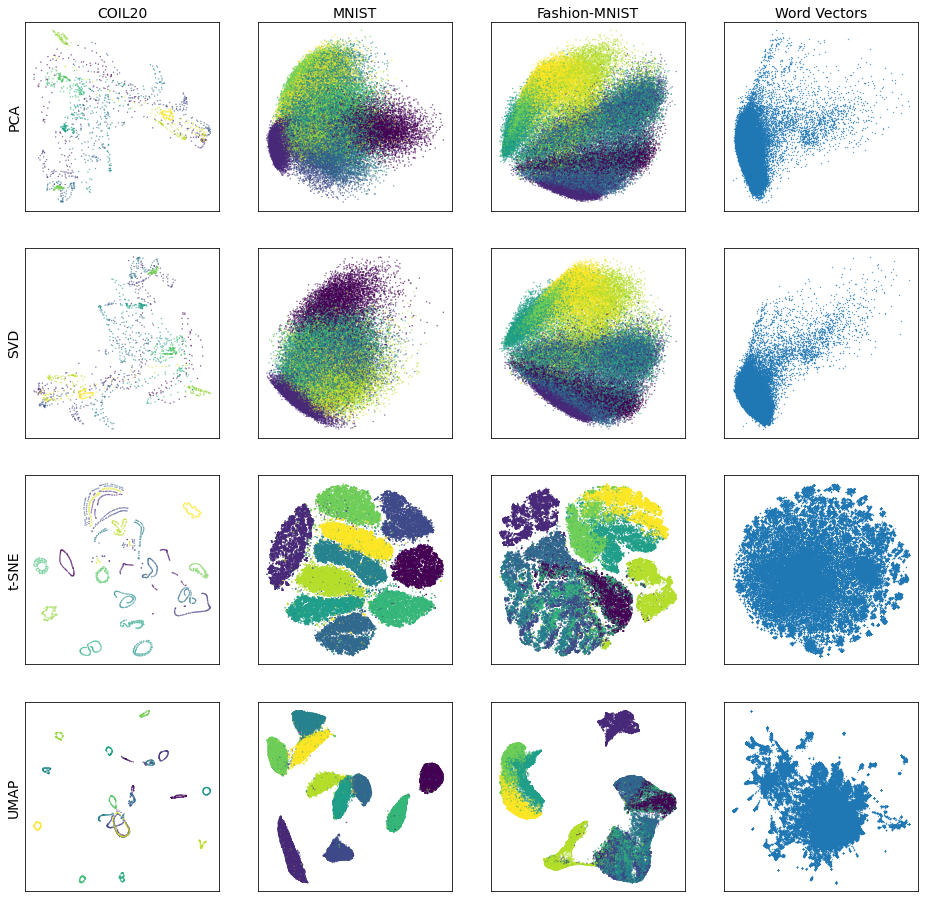

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, (model, m_name) in enumerate(models):
    for j, (X, y, d_name) in enumerate(datasets):
        if i == 0:
            axs[i, j].set_xlabel(f'{d_name}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'{m_name}', fontsize=14)
        embeddings = model.fit_transform(X)
        if d_name == 'Word Vectors':
          axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], s=0.1)
        else:
          axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=y, s=0.1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

output.clear()
plt.show()

# Summary
We can see that:
- PCA and SVD algorithms work fast, but don't show very good results, clustering isn't clear
- t-SNE shows good results and works too slow
- UMAP also gives good clustering, but works faster. So we can say it's the most optimal method. 